In [392]:
# Importing some basic libraries 

In [393]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [394]:
# Loading our dataset

In [395]:
df = pd.read_csv('loan_prediction.csv')

In [396]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


So our dataset has 614 entries and 13 columns

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [399]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [400]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
    

In [499]:
# Dropping Loan_ID col

In [401]:
df.drop('Loan_ID',axis=1,inplace=True)

In [402]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [403]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [404]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [405]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [500]:
# Except LoanAmount col. I am replacing all the null values for all the columns with their MODE by using Simple Imputer. Because they in categorical type.

In [406]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

for i in df.columns:
    if i == 'LoanAmount':
        continue
    else:
        df[i] = imputer.fit_transform(df[i].values.reshape(-1, 1))



In [407]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [408]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [409]:
df.Married.value_counts()

Married
1.0    401
0.0    213
Name: count, dtype: int64

In [410]:
df.Self_Employed.value_counts()

Self_Employed
0.0    532
1.0     82
Name: count, dtype: int64

In [411]:
df.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [412]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [413]:
df.Dependents.head(20)

0     0.0
1     1.0
2     0.0
3     0.0
4     0.0
5     2.0
6     0.0
7     3.0
8     2.0
9     1.0
10    2.0
11    2.0
12    2.0
13    0.0
14    2.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
Name: Dependents, dtype: float64

In [414]:
df.Dependents.value_counts()

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64

In [501]:
# Imputing all the null values by using KNN Imputer for the left columns having null values

In [415]:
from sklearn.impute import KNNImputer

In [416]:
ncols = df.select_dtypes(include=[np.number])
KNNI = KNNImputer(n_neighbors=7)
df_new = KNNI.fit_transform(ncols)
df_new = pd.DataFrame(df_new, columns=ncols.columns)

In [417]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,160.285714,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [418]:
df=df_new

In [419]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now no null values are present

In [503]:
# Checking mean value for LoanAmount col

In [420]:
df.LoanAmount.mean()

146.3604001861331

In [505]:
# Checking max value for the ApplicantIncome column and LoanAmount column

In [421]:
df.ApplicantIncome.max()

81000.0

In [422]:
df.LoanAmount.max()

700.0

## Bivariate Analysis

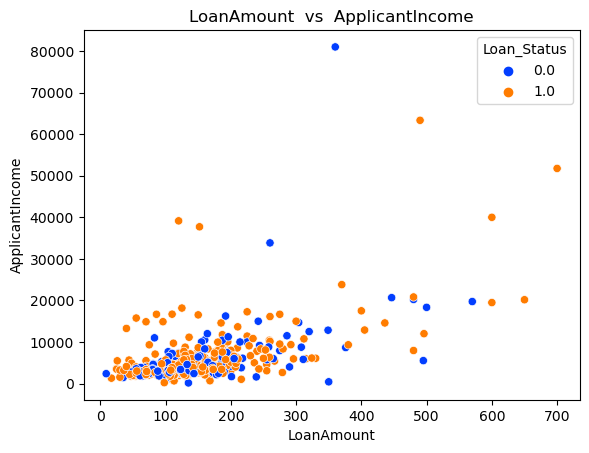

In [423]:
plt.title('LoanAmount  vs  ApplicantIncome')
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data= df ,hue='Loan_Status',palette= "bright" )
plt.show()

LoanAmount and ApplicantIncome are not that much related 

In [424]:
df.Loan_Status.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

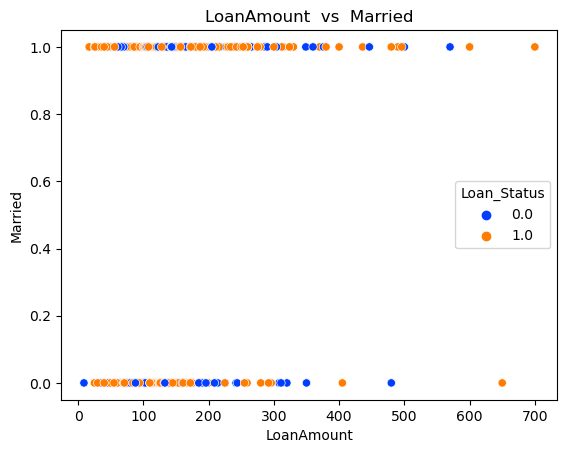

In [425]:
plt.title('LoanAmount  vs  Married')
sns.scatterplot(x='LoanAmount',y='Married',data= df ,hue='Loan_Status',palette= "bright" )
plt.show()

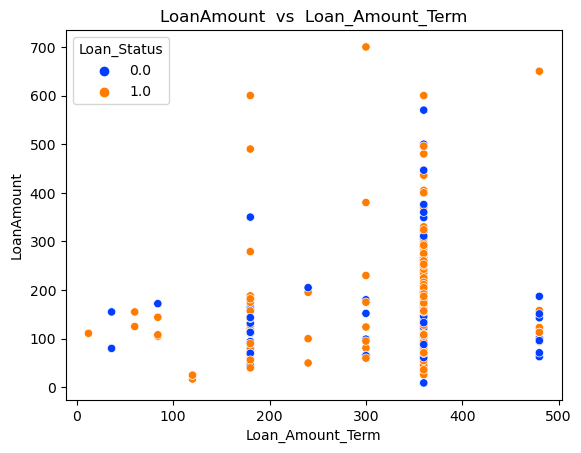

In [426]:
plt.title('LoanAmount  vs  Loan_Amount_Term')
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',data= df ,hue='Loan_Status',palette= "bright" )
plt.show()

In [427]:
df.shape

(614, 12)

In [428]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.360400,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.289934,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [506]:
# Plotting distplot to check the distribution of the columns

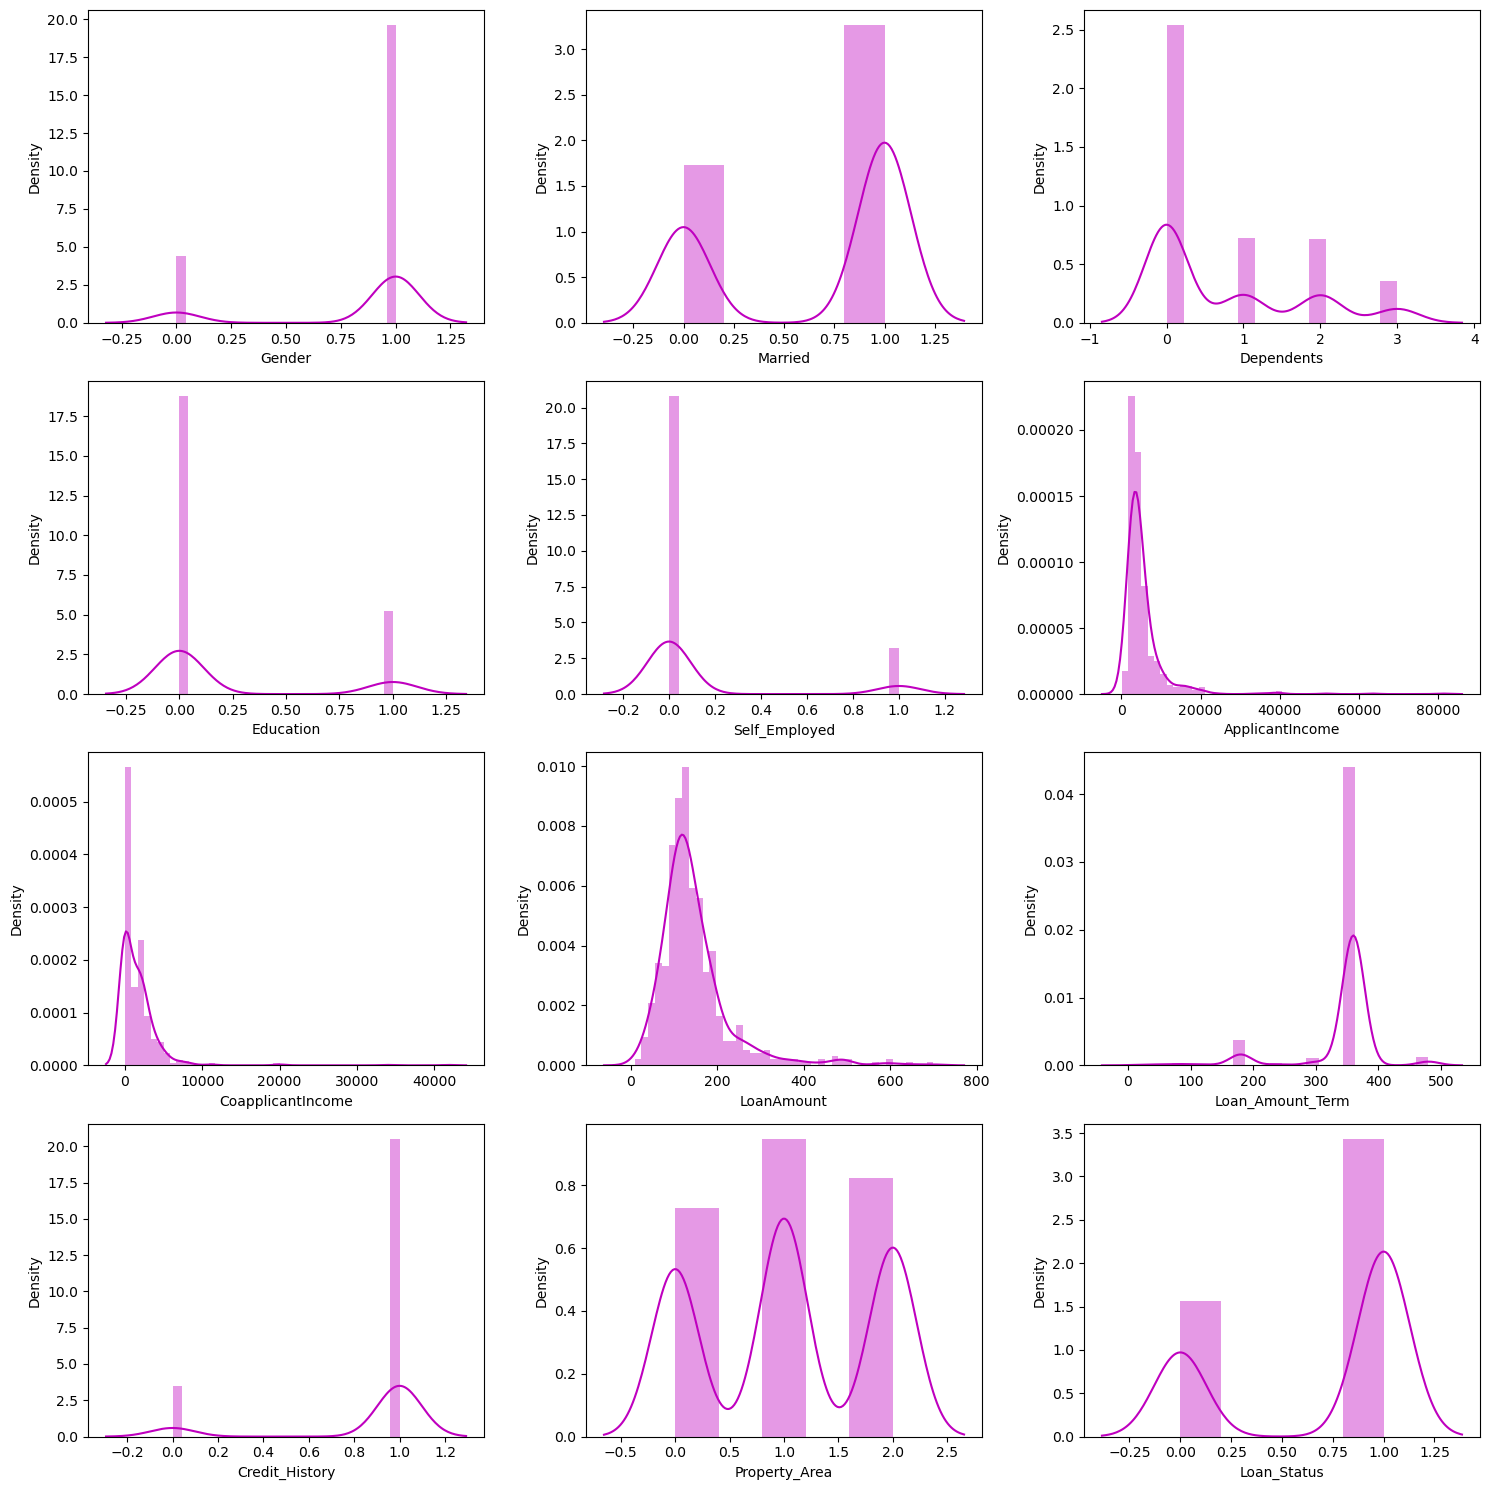

In [429]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History these columns has skewness present

In [507]:
# Checking the skewness present in the columns

In [430]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.676606
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [508]:
# Separarting skewed col and normal col

In [431]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() >0.5) or (df[i].skew() <-0.5):
        skewed_col.append(i)
    else:
        normal_col.append(i)

print('skewed_col is :',skewed_col)
print('\n')
print("Normal_col is :",normal_col)

skewed_col is : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


Normal_col is : ['Property_Area']


In [509]:
# Removing skewness by using cube root techinque

In [432]:
for i in skewed_col:
    df[i]=np.cbrt(df[i])

In [433]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.845875
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

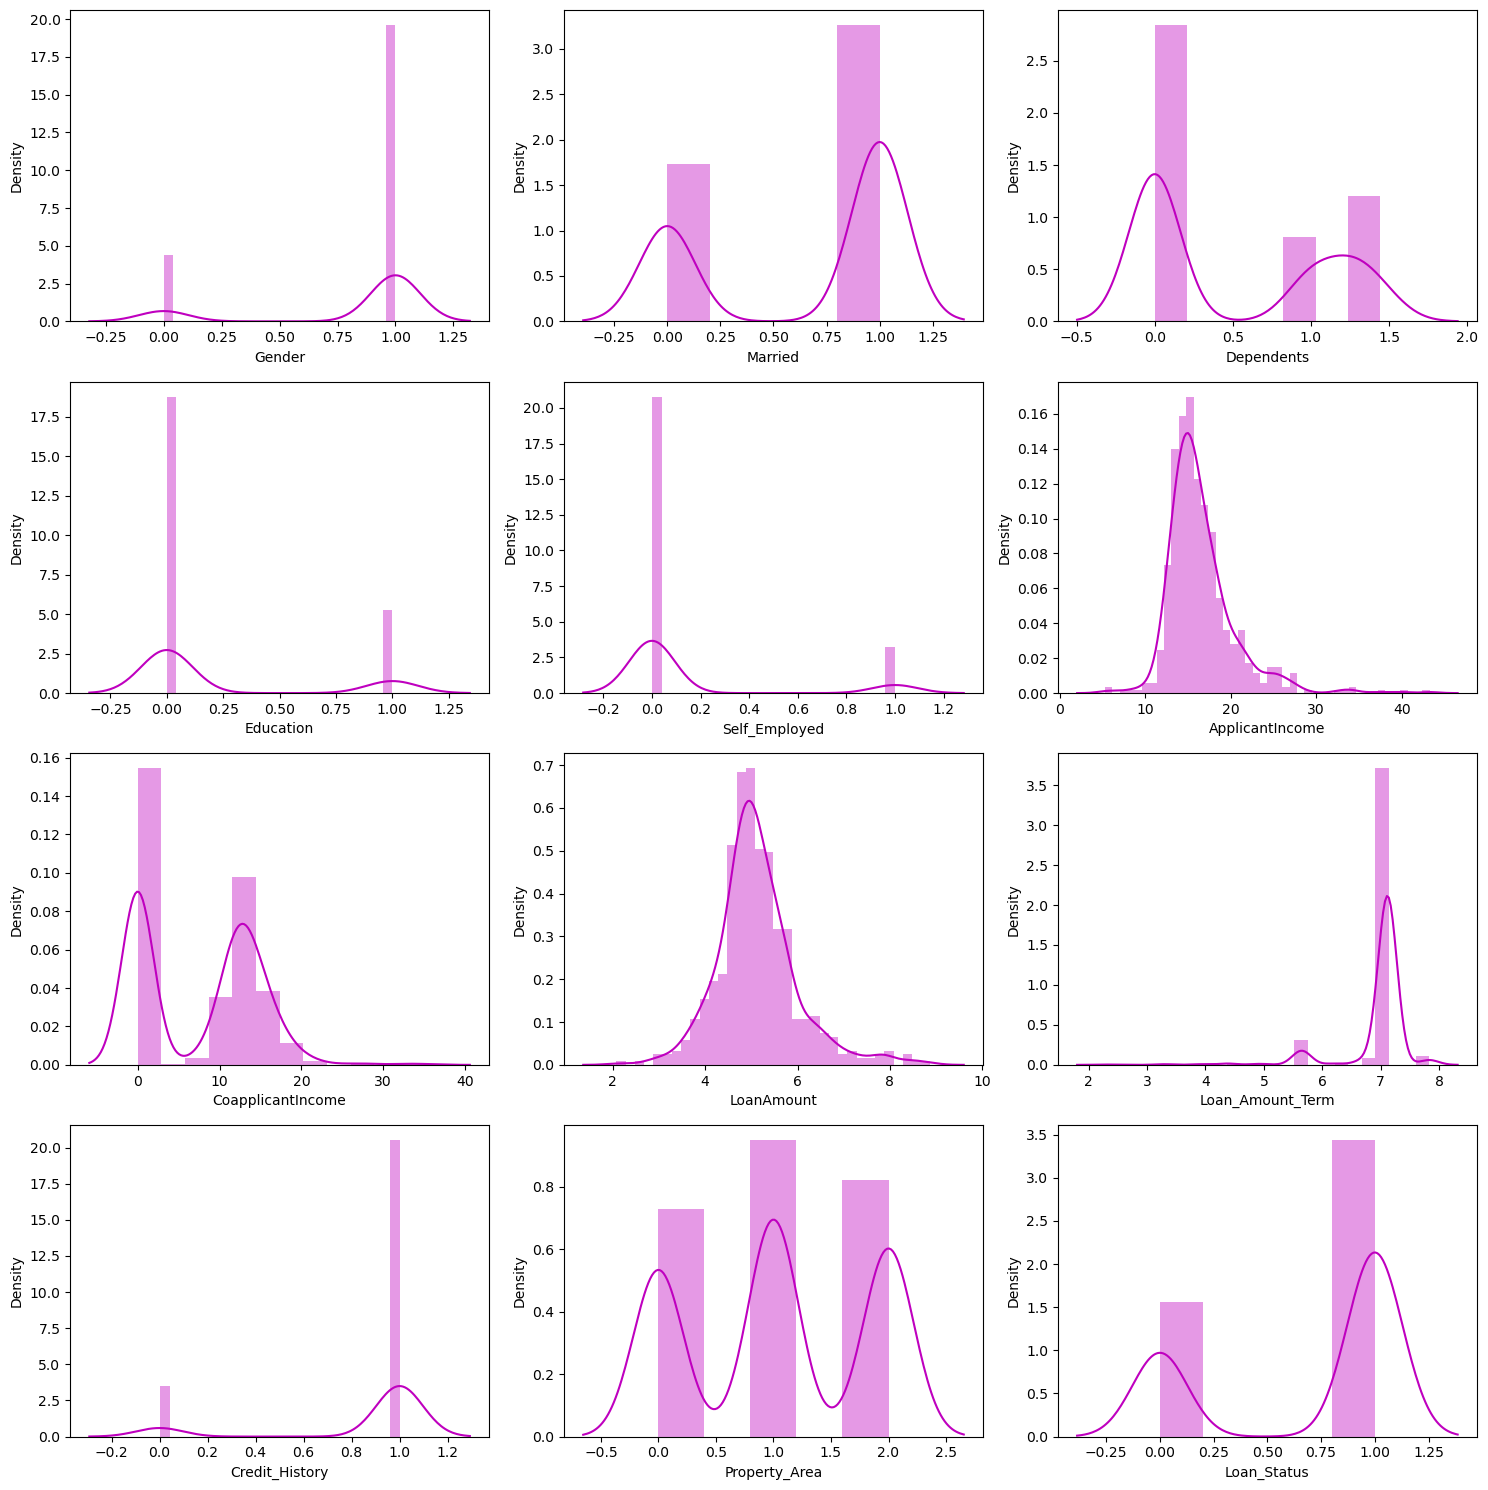

In [434]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

Now we can see that skewness is almost removed

In [510]:
# plotting boxplot to check the outliers present in the columns and the range 

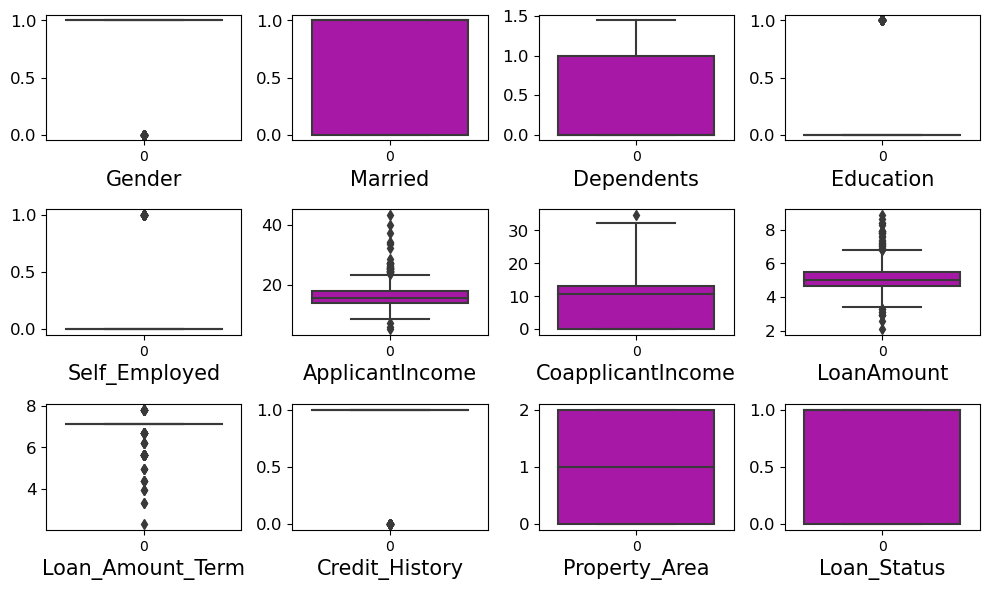

In [435]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

In [436]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [437]:
a=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [511]:
# Removing outliers by zscore method

In [438]:
curr=df[a]

In [439]:
from scipy.stats import zscore

In [440]:
z=np.abs(zscore(curr))

In [441]:
print(np.where(z>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
       523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64), array([8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 7, 5, 5, 8, 8, 7, 8, 5, 7, 7, 5, 5,
       7, 8, 8, 7, 7, 8, 7, 7, 8, 6, 8, 6, 7], dtype=int64))


In [442]:
df_new = df[(z<3).all(axis=1)]

In [443]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,18.017473,0.000000,5.432065,7.113787,1.0,2.0,1.0
1,1.0,1.0,1.000000,0.0,0.0,16.610522,11.467457,5.039684,7.113787,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,14.422496,0.000000,4.041240,7.113787,1.0,2.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,13.720654,13.310098,4.932424,7.113787,1.0,2.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,18.171206,0.000000,5.204828,7.113787,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,14.260431,0.000000,4.140818,7.113787,1.0,0.0,1.0
610,1.0,1.0,1.442250,0.0,0.0,16.013010,0.000000,3.419952,5.646216,1.0,0.0,1.0
611,1.0,1.0,1.000000,0.0,0.0,20.059821,6.214465,6.324704,7.113787,1.0,2.0,1.0
612,1.0,1.0,1.259921,0.0,0.0,19.646281,0.000000,5.718479,7.113787,1.0,2.0,1.0


After removing outliers. our dataset has now 582 entries. previously we have 614 entries

In [444]:
df=df_new

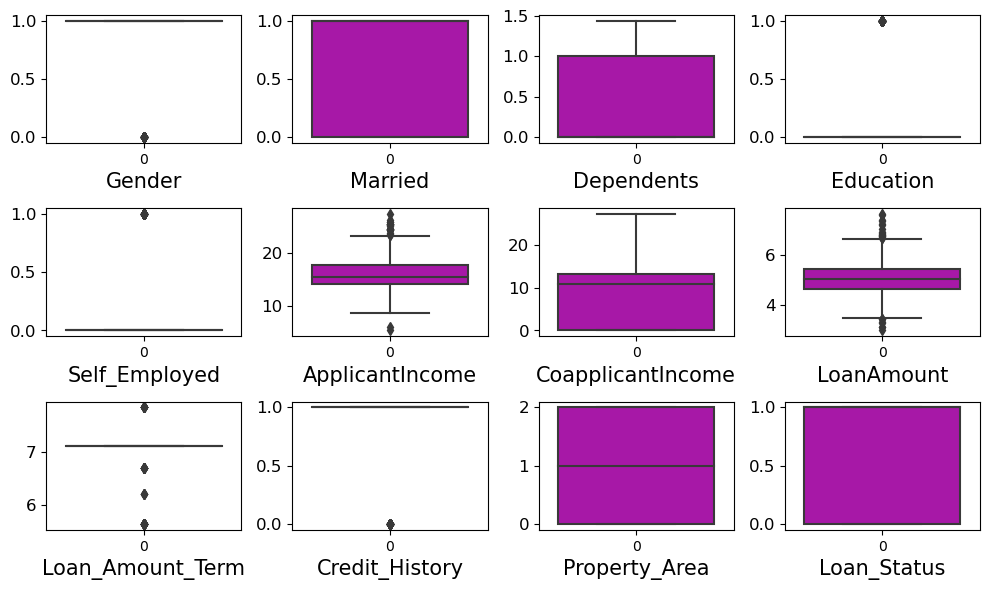

In [445]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

Gender
1.0    476
0.0    106
Name: count, dtype: int64

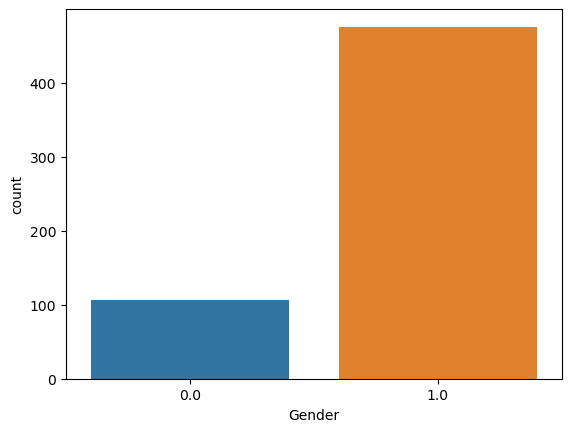

In [446]:
#visualize the no of gender 
ax = sns.countplot(x='Gender',data = df)
df['Gender'].value_counts()

Loan_Status
1.0    402
0.0    180
Name: count, dtype: int64

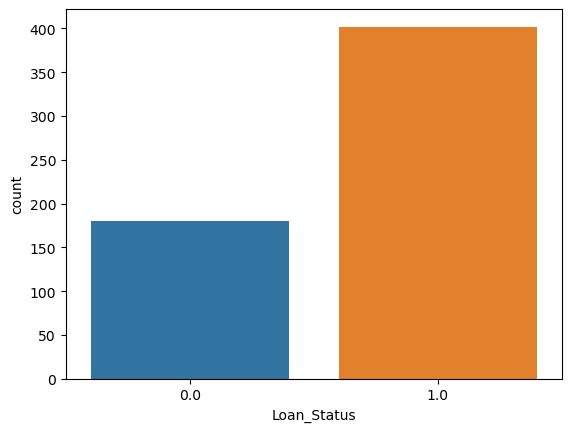

In [447]:
#visualize the no of Loan_status 
ax = sns.countplot(x='Loan_Status',data = df)
df['Loan_Status'].value_counts()

Married
1.0    379
0.0    203
Name: count, dtype: int64

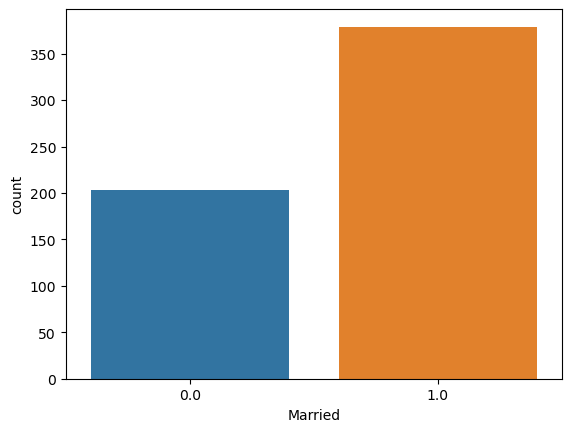

In [448]:
#visualize the no of Married 
ax = sns.countplot(x='Married',data = df)
df['Married'].value_counts()

Self_Employed
0.0    507
1.0     75
Name: count, dtype: int64

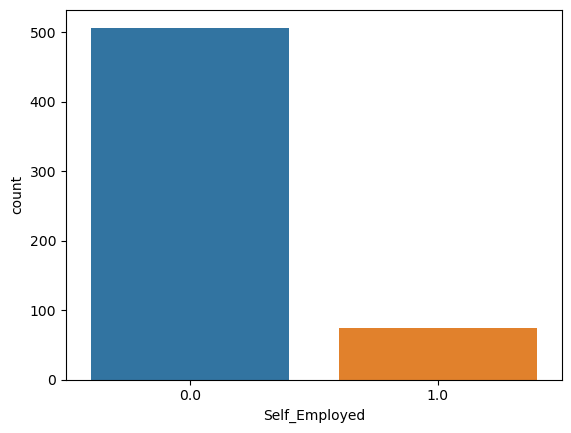

In [449]:
#visualize the no of Self_Employed 
ax = sns.countplot(x='Self_Employed',data = df)
df['Self_Employed'].value_counts()

Credit_History
1.0    496
0.0     86
Name: count, dtype: int64

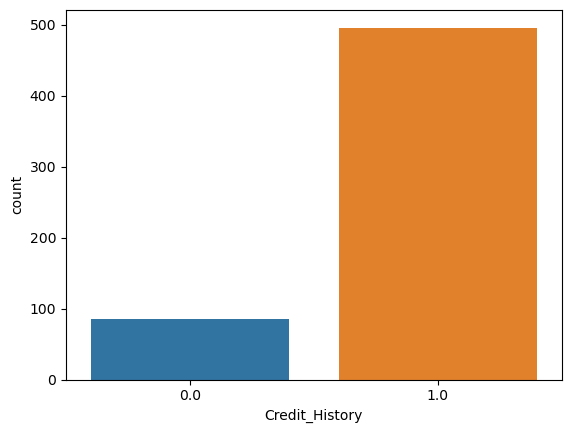

In [450]:
#visualize the no of Credit_history 
ax = sns.countplot(x='Credit_History',data = df)
df['Credit_History'].value_counts()

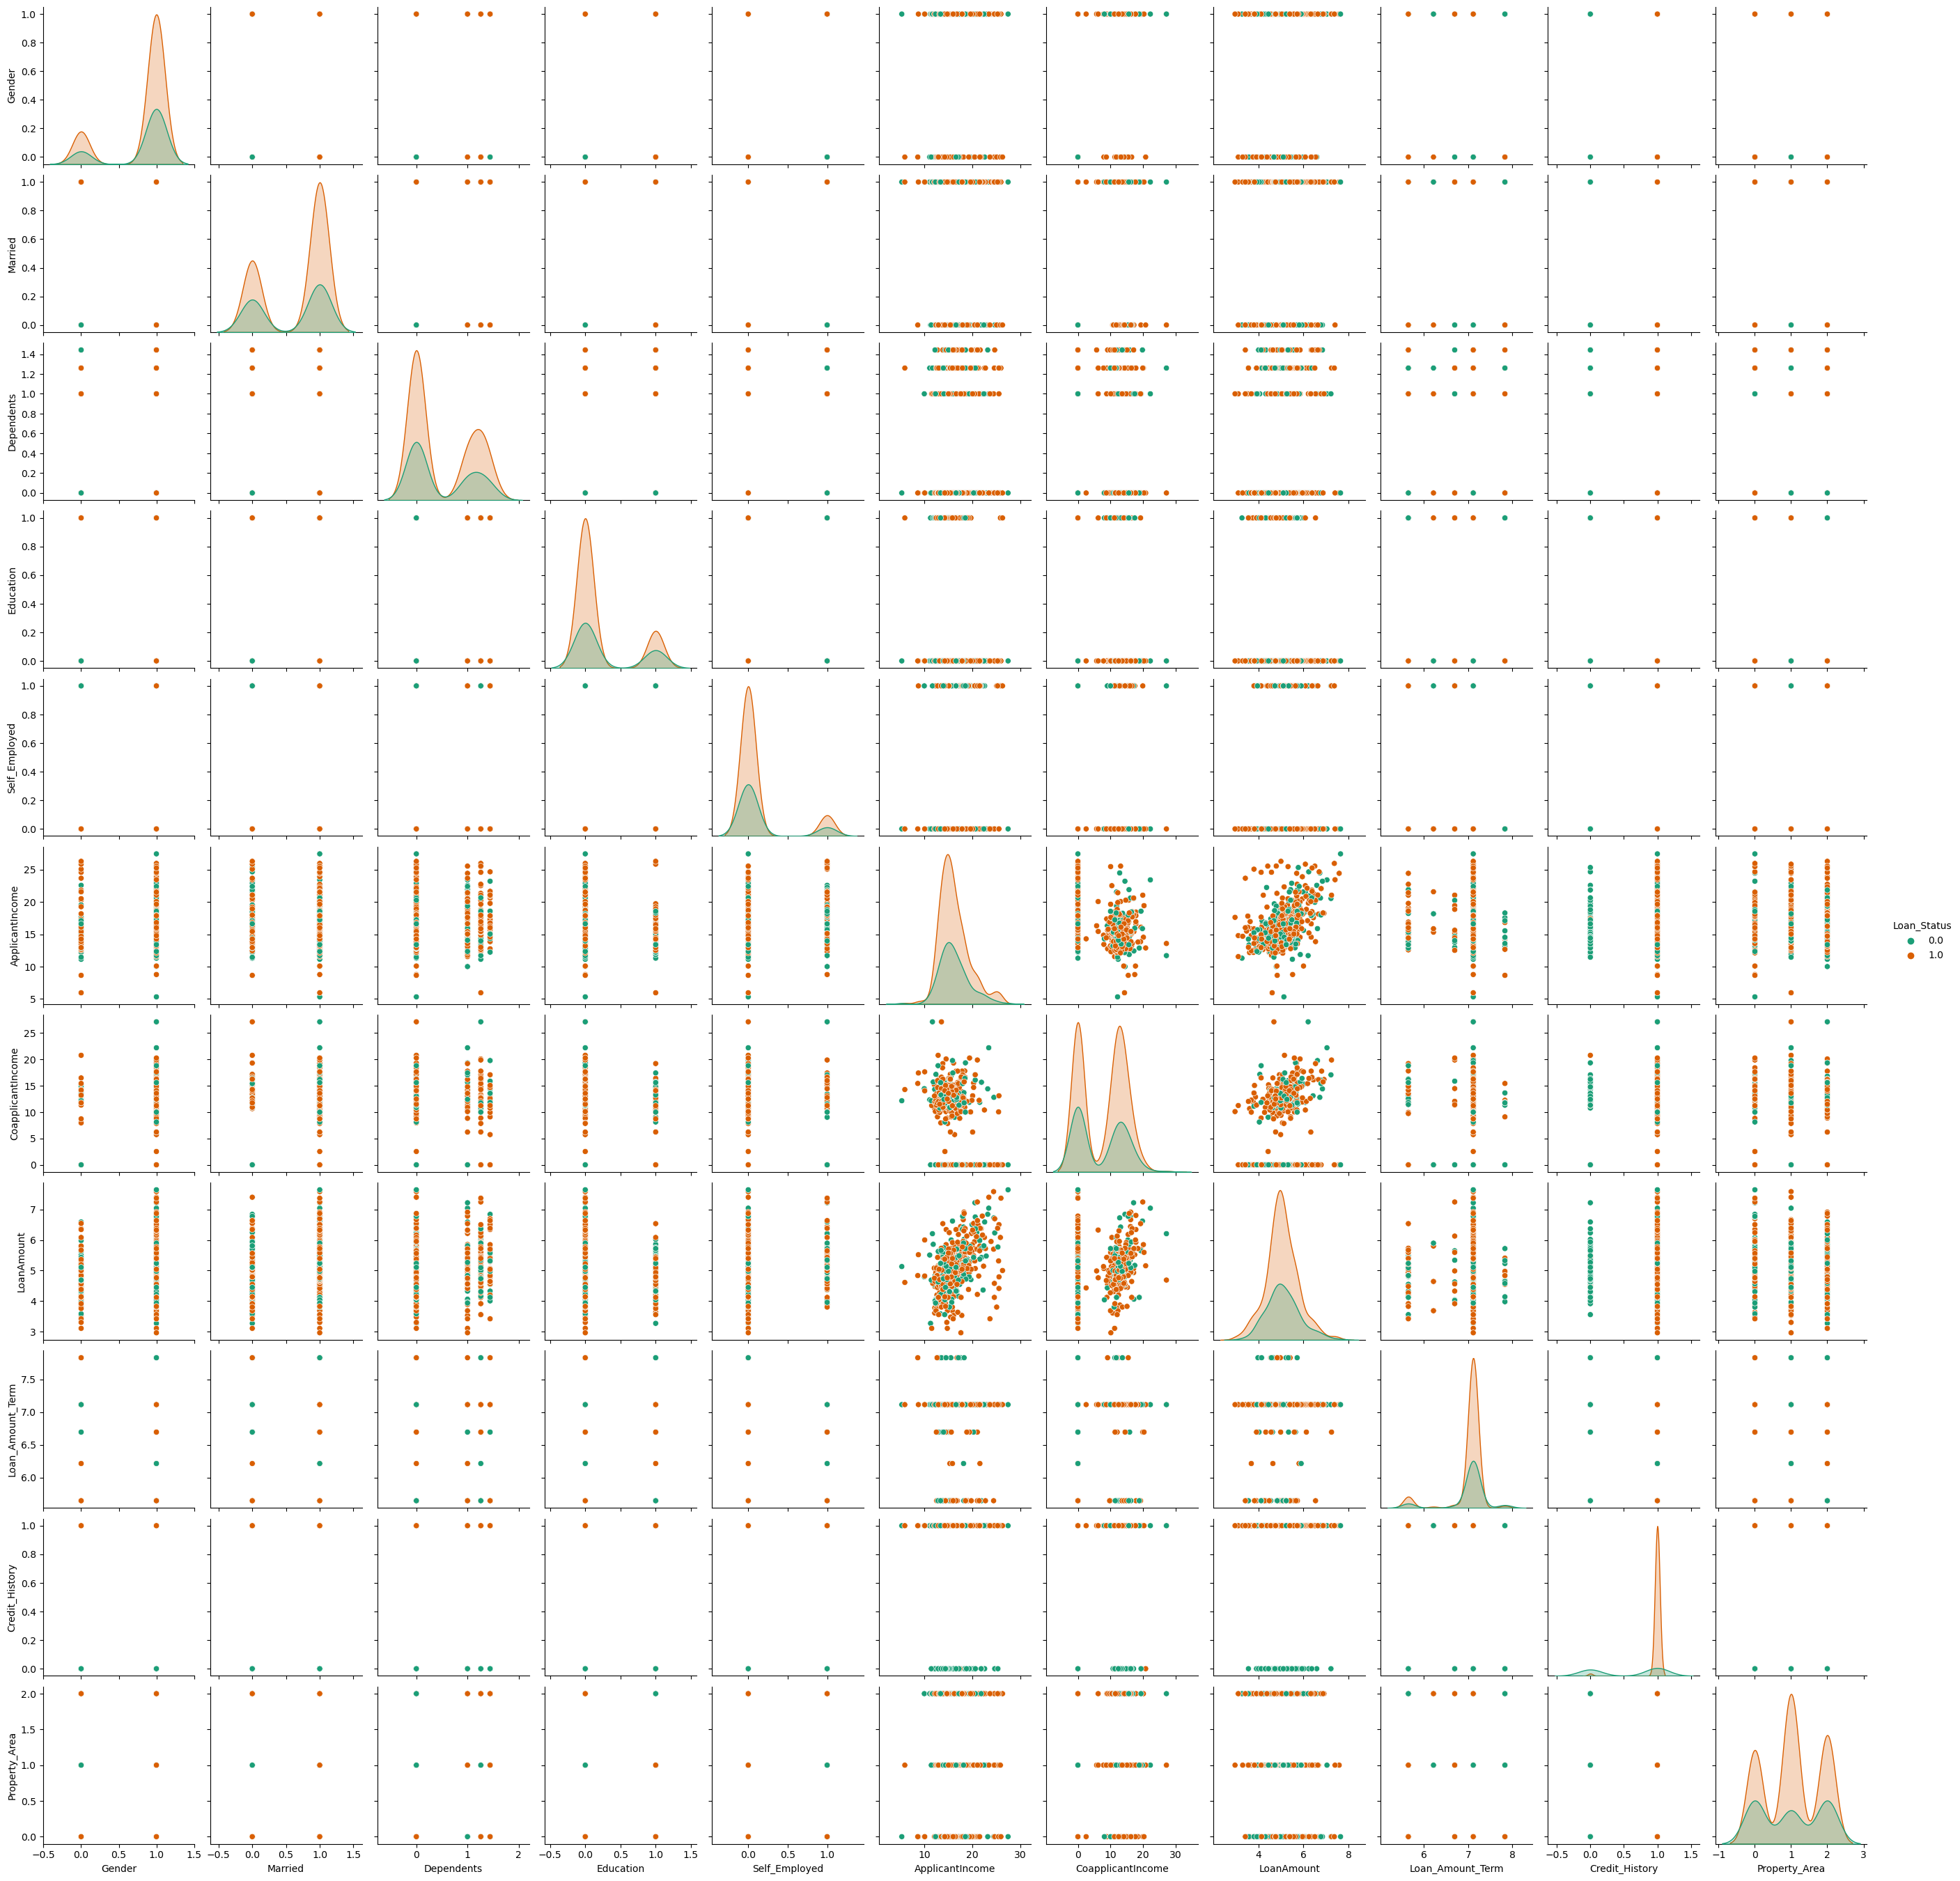

In [451]:
sns.pairplot(df,hue='Loan_Status',palette ='Dark2' )

by analysing pairplot we can see that LoanAmount, applicant Income and coapplicant income are not linearly related with each other 

In [512]:
# Checking the correlation between the columns 

In [452]:
cor = df.corr()

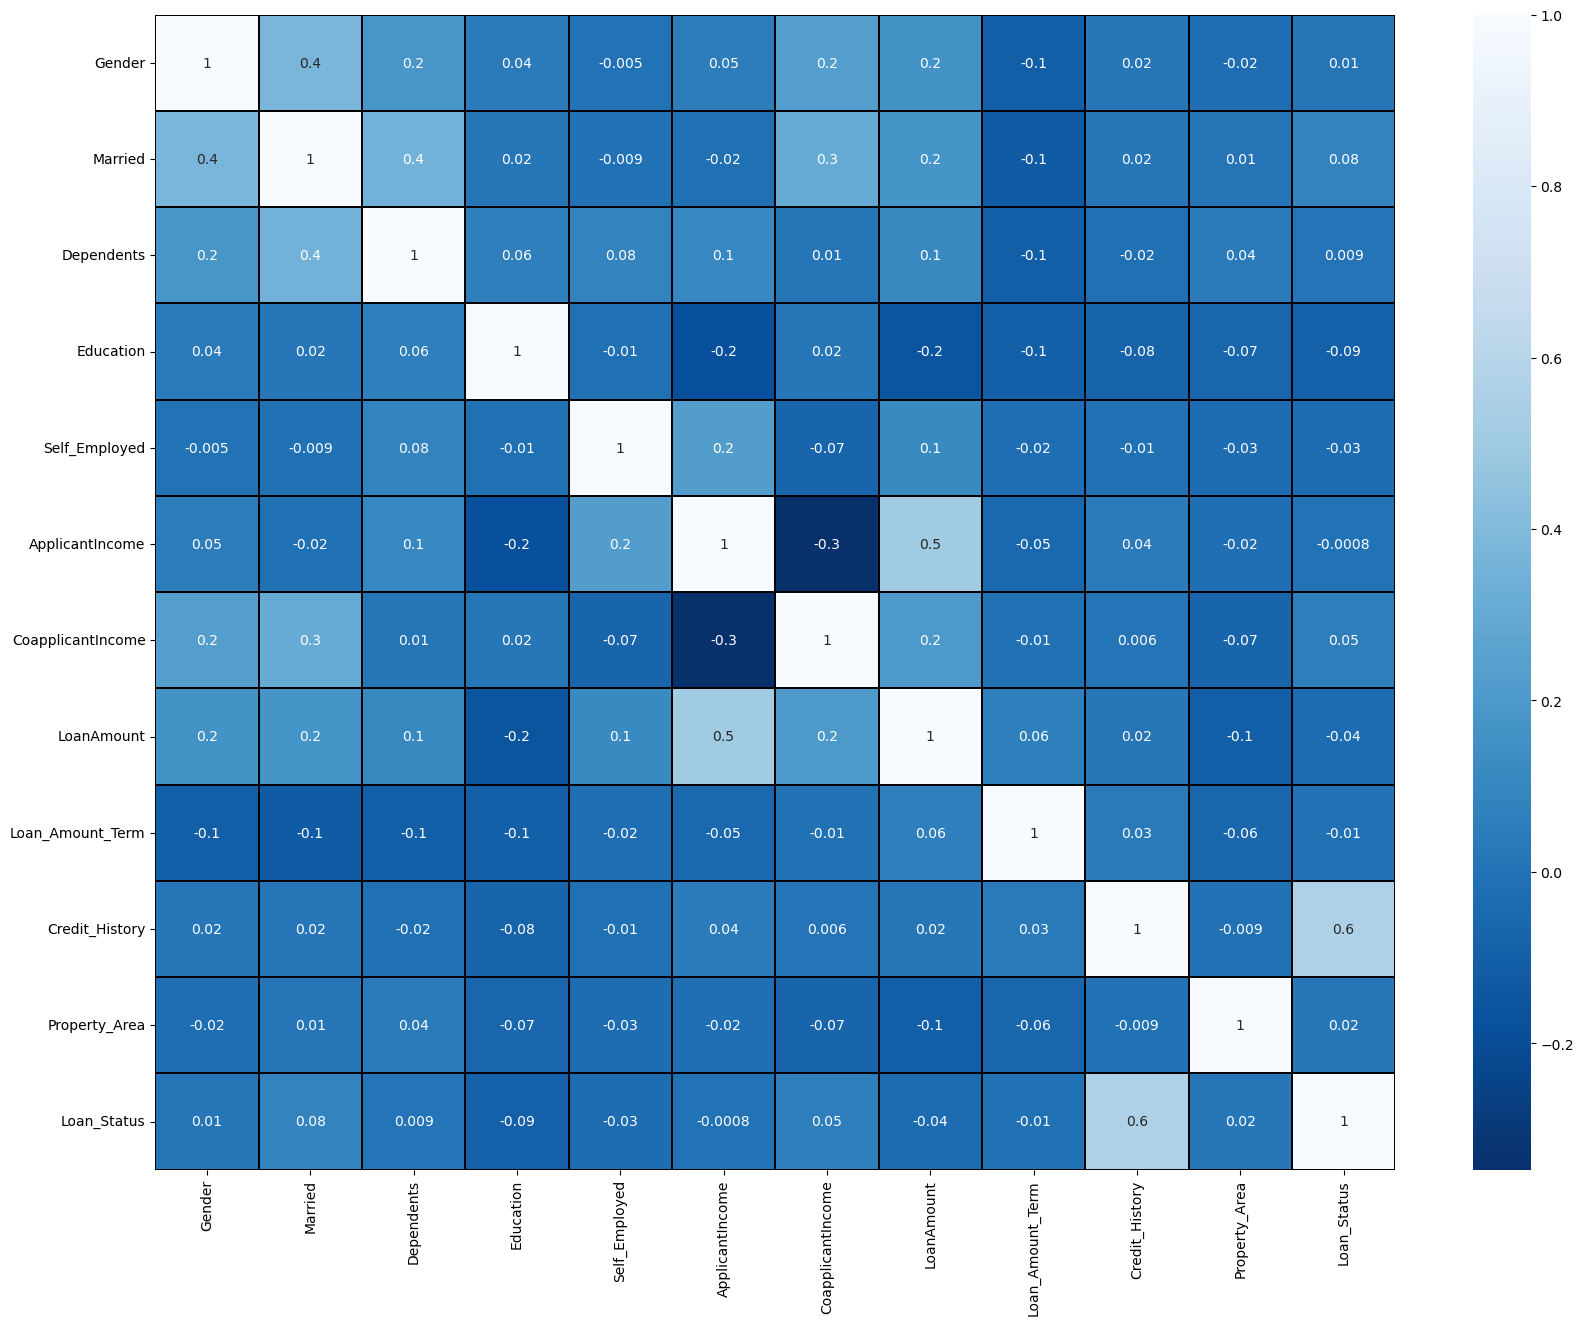

In [453]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

So we can see that Loan_Status col has very slight correlation with the other columns 

In [454]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.559425
Married              0.079691
CoapplicantIncome    0.054170
Property_Area        0.024835
Gender               0.011717
Dependents           0.008545
ApplicantIncome     -0.000754
Loan_Amount_Term    -0.009940
Self_Employed       -0.031113
LoanAmount          -0.035283
Education           -0.093325
Name: Loan_Status, dtype: float64

Dependents and ApplicantIncome cols has very less correlation with the Loan_Status col

In [455]:
#df.drop('Dependents',axis=1,inplace=True)
#df.drop('ApplicantIncome',axis=1,inplace=True)

So Credit history is an important column. apart from this every columns has very less correlation with the Loan_Status column

In [456]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [513]:
# Separating x and y

In [457]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [515]:
# Checking the multicolinerity by using vif method

In [458]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [459]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds


,col,vif
0,Gender,6.592429
1,Married,4.017082
2,Dependents,1.958225
3,Education,1.332328
4,Self_Employed,1.216229
5,ApplicantIncome,53.602034
6,CoapplicantIncome,3.475021
7,LoanAmount,87.134872
8,Loan_Amount_Term,56.829130
9,Credit_History,6.784271


LoanAmount,ApplicantIncome,Loan_Amount_Term	cols has very high vif values

In [460]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.471899,-1.366380,-0.809456,-0.538949,-0.384615,0.593212,-1.085906,0.504953,0.250115,0.416398,1.233480
1,0.471899,0.731861,0.875034,-0.538949,-0.384615,0.138031,0.577354,-0.035849,0.250115,0.416398,-1.307708
2,0.471899,0.731861,-0.809456,-0.538949,2.600000,-0.569845,-1.085906,-1.411965,0.250115,0.416398,1.233480
3,0.471899,0.731861,-0.809456,1.855464,-0.384615,-0.796907,0.844614,-0.183681,0.250115,0.416398,1.233480
4,0.471899,-1.366380,-0.809456,-0.538949,-0.384615,0.642948,-1.085906,0.191762,0.250115,0.416398,1.233480
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.119096,-1.366380,-0.809456,-0.538949,-0.384615,-0.622277,-1.085906,-1.274721,0.250115,0.416398,-1.307708
578,0.471899,0.731861,1.619998,-0.538949,-0.384615,-0.055277,-1.085906,-2.268262,-3.384417,0.416398,-1.307708
579,0.471899,0.731861,0.875034,-0.538949,-0.384615,1.253958,-0.184549,1.735242,0.250115,0.416398,1.233480
580,0.471899,0.731861,1.312868,-0.538949,-0.384615,1.120169,-1.085906,0.899707,0.250115,0.416398,1.233480


In [461]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [462]:
y1.value_counts()

Loan_Status
1.0    402
0.0    402
Name: count, dtype: int64

Now our target classes are properly balanced

In [516]:
# Importing some metrices from sklearn

In [463]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [517]:
# Checking for the best random_state value

In [464]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier(n_jobs=-1)
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs)  

best acc : 0.906832298136646 random_state : 108


In [479]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [518]:
# Importing Cross_val_score

In [480]:
from sklearn.model_selection import cross_val_score

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [519]:
# Importing some classification algorithmns

In [482]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [521]:
# Making the instances of the algorithmns

In [483]:
RFC=RandomForestClassifier(n_jobs=-1)
ET=ExtraTreesClassifier(n_jobs=-1)
LR=LogisticRegression(n_jobs=-1)
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier(n_jobs=-1)
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_jobs=-1)
MNB=MultinomialNB()
GNB=GaussianNB()

In [484]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [485]:
from sklearn.metrics import roc_auc_score

In [522]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [486]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('roc_auc_score will be :',roc_auc_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and roc_auc_score will be :',roc_auc_score(y_test,pred)-score.mean())
    print('\n')
    

This is for : RandomForestClassifier(n_jobs=-1)
roc_auc_score will be : 0.9203339575530587
confusion matrix will be : 

[[67  5]
 [ 8 81]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        72
         1.0       0.94      0.91      0.93        89

    accuracy                           0.92       161
   macro avg       0.92      0.92      0.92       161
weighted avg       0.92      0.92      0.92       161

Cross val score will be : [0.8965849  0.85209235 0.87590188 0.91348974 0.87585533]
Mean cv : 0.8827848376235472
Difference between cv and roc_auc_score will be : 0.03754911992951149


This is for : ExtraTreesClassifier(n_jobs=-1)
roc_auc_score will be : 0.8952091136079899
confusion matrix will be : 

[[65  7]
 [10 79]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        72
         1.0       0.92      0.89   

In [523]:
# Importing Grid Search CV for Hyper parameter Tuning

In [487]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting best parameters for the RandomForestClassifier

In [488]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None],'bootstrap':['bool',True]}

In [489]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)

In [524]:
# Fitting the model

In [490]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['bool', True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [525]:
# Checking the best parameters 

In [491]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150,
 'n_jobs': -1}

So these are the best parameters 

In [526]:
# Train our final model based on the best parameter obtained by the grid search CV

In [494]:
final_model = RandomForestClassifier(criterion = "entropy",bootstrap = True,max_depth=None,max_leaf_nodes=None,n_estimators=150,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('roc_auc_score will be :',roc_auc_score(y_test,pred))
print('accuracy_score will be :',acc*100)

roc_auc_score will be : 0.9133895131086142
accuracy_score will be : 91.30434782608695


In [495]:
# Lets save our model
import joblib
filename = 'loan_prediction.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [527]:
# Plotting RocCurve

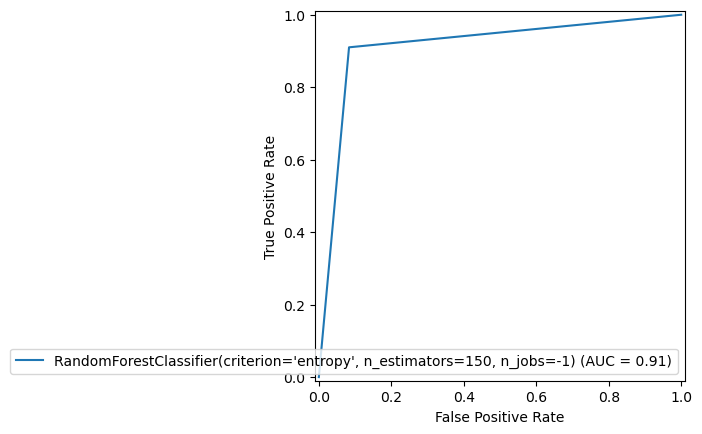

In [496]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [528]:
# Checking for the auc score

In [497]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9133895131086142

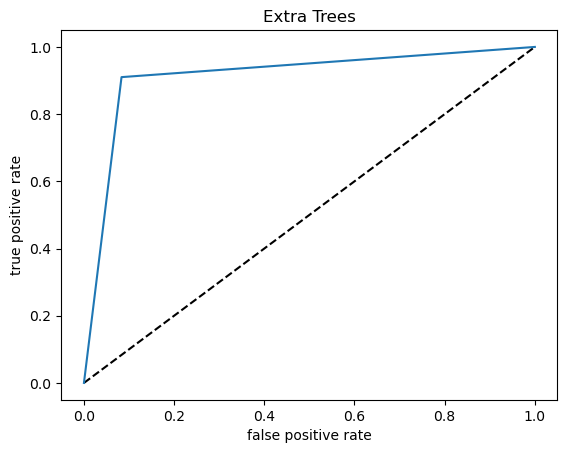

In [498]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Extra Trees')
plt.show()